# AirBnb Paris

### Preparing data

In [0]:
pip install ipyleaflet

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import seaborn as sns
from ipyleaflet import Map, Marker, MarkerCluster
import folium
from folium.plugins import FastMarkerCluster

# Veuillez entrer le répertoire où se trouvent les datasets dans la variable suivante.
dataset_repertory = "/content/drive/My Drive/Dataset/"

# if dataset_repertory[-1] != "/":
#     dataset_repertory += "/"
    
plt.style.use('seaborn-dark')
plt.rcParams["figure.figsize"] = (14,4)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
df = pd.read_csv(dataset_repertory+"listings.csv.gz", compression='gzip', low_memory=False)

In [0]:
planning = pd.read_csv(dataset_repertory+"calendar.csv.gz", compression='gzip', low_memory=False)

In [0]:
list(df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


### 1.Neighbourhoods

In [0]:
print("Il y a %i \"neighbourhood\" différents dans la base de données de AirBnb Paris." %df.neighbourhood.nunique())

Il y a 63 "neighbourhood" différents dans la base de données de AirBnb Paris.


Afin de représenter visuellement la distribution sous forme de barchart, nous avons besoin d'une division plus générale.

In [0]:
print("Il y a %i \"neighbourhood_cleansed\" différents dans la base de données de AirBnb Paris." %df.neighbourhood_cleansed.nunique())

Il y a 20 "neighbourhood_cleansed" différents dans la base de données de AirBnb Paris.


In [0]:
df.neighbourhood_cleansed.unique()

array(['Observatoire', 'Hôtel-de-Ville', 'Opéra', 'Ménilmontant',
       'Louvre', 'Popincourt', 'Buttes-Montmartre', 'Élysée', 'Panthéon',
       'Entrepôt', 'Gobelins', 'Buttes-Chaumont', 'Luxembourg',
       'Palais-Bourbon', 'Reuilly', 'Bourse', 'Vaugirard',
       'Batignolles-Monceau', 'Temple', 'Passy'], dtype=object)

Cette division semble optimale pour notre objectif.

In [0]:
df.neighbourhood_cleansed.isna().sum()

0

De plus, cette division n'a aucune valeur null.

In [0]:
df.groupby("neighbourhood_cleansed").id.count().sort_values(ascending = False)

neighbourhood_cleansed
Buttes-Montmartre      7392
Popincourt             6405
Vaugirard              4840
Entrepôt               4553
Batignolles-Monceau    4422
Ménilmontant           3809
Buttes-Chaumont        3681
Passy                  3253
Temple                 3071
Opéra                  2991
Reuilly                2697
Observatoire           2503
Gobelins               2260
Bourse                 2171
Panthéon               2163
Hôtel-de-Ville         1982
Luxembourg             1910
Palais-Bourbon         1848
Élysée                 1742
Louvre                 1277
Name: id, dtype: int64

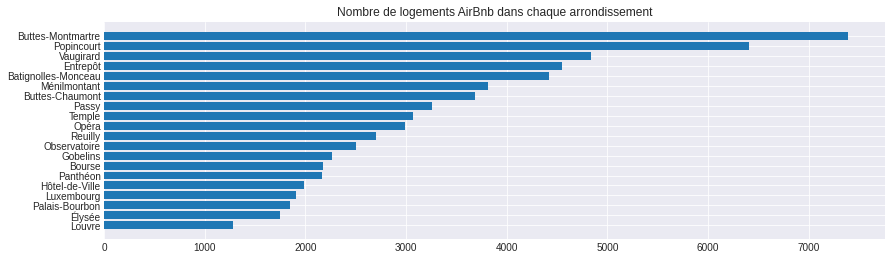

In [0]:
grp = df.groupby("neighbourhood_cleansed").id.count().sort_values(ascending=True)
plt.barh(grp.index, grp )
plt.grid()
plt.title("Nombre de logements AirBnb dans chaque arrondissement")
plt.show()

### 2. Property types

In [0]:
prop = df.groupby(["property_type","room_type"]).id.count().unstack()

In [0]:
prop.fillna(0, inplace=True)
prop

room_type,Entire home/apt,Hotel room,Private room,Shared room
property_type,,,,
Aparthotel,2.0,20.0,3.0,0.0
Apartment,52355.0,0.0,5707.0,336.0
Barn,1.0,0.0,0.0,0.0
Bed and breakfast,5.0,88.0,138.0,0.0
Boat,9.0,0.0,6.0,1.0
Boutique hotel,4.0,1195.0,72.0,1.0
Bungalow,1.0,0.0,0.0,0.0
Cabin,0.0,0.0,0.0,1.0
Camper/RV,0.0,0.0,0.0,1.0


L'immense majorité des logements sont de type appartement, et la plupart des types ne seront pas représentatifs sur notre graphique. Nous pouvons donc filtrer les types qui ont 400 représentants au minimum.

In [0]:
prop=prop[prop.sum(axis=1)>400]

In [0]:
prop["total"]=prop.sum(axis=1)
prop=prop.sort_values(by="total", ascending=True).drop(columns="total")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
prop

room_type,Entire home/apt,Hotel room,Private room,Shared room
property_type,,,,
Serviced apartment,89.0,381.0,6.0,1.0
House,376.0,0.0,105.0,7.0
Loft,1126.0,0.0,85.0,7.0
Boutique hotel,4.0,1195.0,72.0,1.0
Condominium,1719.0,0.0,289.0,57.0
Apartment,52355.0,0.0,5707.0,336.0


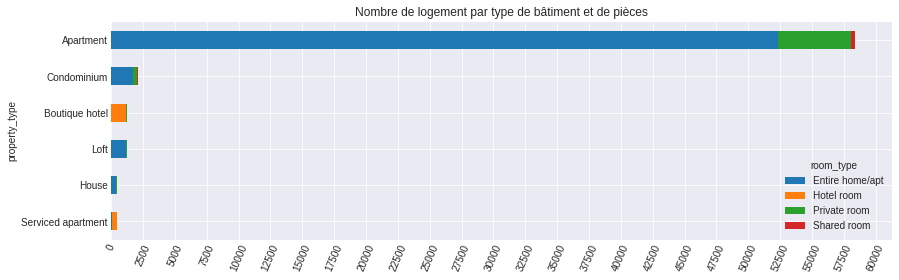

In [0]:
prop.plot(kind="barh", stacked=True)
plt.xticks(np.arange(0,62500,2500), rotation=67)
plt.grid()
plt.title("Nombre de logement par type de bâtiment et de pièces")
plt.show()

### 3. Accommodates

Voici les données qui vont être visualisées :

In [0]:
accom = df.groupby(df.accommodates).accommodates.count()
accom

accommodates
1      2972
2     31560
3      6289
4     16512
5      2559
6      3465
7       508
8       648
9       107
10      170
11       34
12       61
13       13
14       19
15       17
16       35
17        1
Name: accommodates, dtype: int64

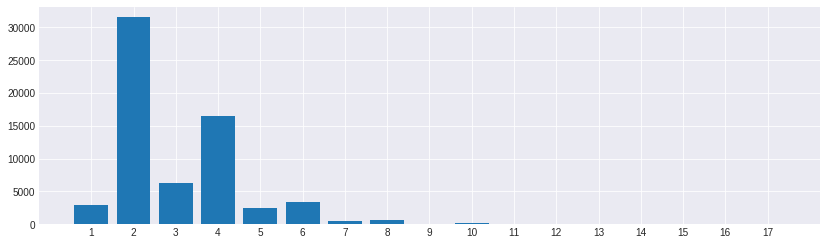

In [0]:
plt.bar(accom.index, accom)
plt.grid(which="major")
plt.grid(which="minor")
plt.xticks(ticks=np.arange(1,accom.index.max()+1))
plt.show()

### 4. Average daily price by neighbourhood_cleansed

Nous avons besoin de calculer le prix moyen par neighbourhood_cleansed. Le prix moyen par logement est déjà présent dans le dataset listings.

In [0]:
df.price

0         $60.00
1        $115.00
2        $119.00
3        $130.00
4         $90.00
          ...   
64965    $100.00
64966     $80.00
64967    $150.00
64968     $90.00
64969     $30.00
Name: price, Length: 64970, dtype: object

In [0]:
def format_price(column):
    return column.str.replace("$","").str.replace(",","").astype(float)

In [0]:
df["price"]=format_price(df.price)

In [0]:
(df.price==0).sum()

8

Six logements on un prix à zéro. Nous allons les supprimer pour dans le cadre de cette visualisation.

In [0]:
df_nozero = df[df.price!=0]

In [0]:
price_means = df_nozero.groupby("neighbourhood_cleansed").price.mean().sort_values(ascending=True)

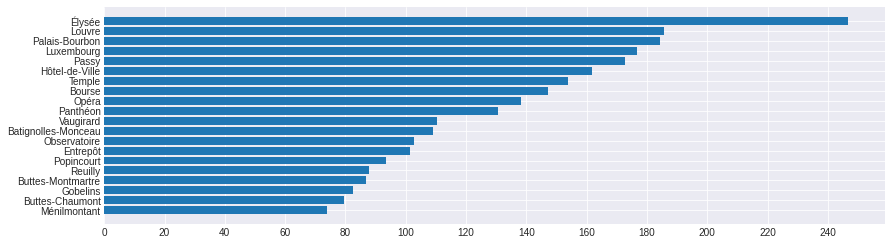

In [0]:
plt.xticks(np.arange(0,price_means.max()+20,20))
plt.barh(price_means.index, price_means)
plt.grid()

### 5. Geographic representation of the number of hostings

In [0]:
import folium
from folium.plugins import FastMarkerCluster
import os
import numpy as np
import folium
from folium import plugins


lats2020 = df['latitude'].tolist()
lons2020 = df['longitude'].tolist()
locations = np.array(list(zip(lats2020, lons2020)))

map1 = folium.Map(location=[48.8566, 2.3522], zoom_start=10)
map1

plugins.MarkerCluster(locations[0:1000]).add_to(map1)
map1

In [0]:
list(zip(lats2020, lons2020))[1:6]

[(48.851000000000006, 2.35869),
 (48.85758, 2.35275),
 (48.87464, 2.34341),
 (48.86528, 2.3932599999999997),
 (48.858990000000006, 2.34735)]

In [0]:
np.array(list(zip(lats2020, lons2020)))


array([[48.83349,  2.31852],
       [48.851  ,  2.35869],
       [48.85758,  2.35275],
       ...,
       [48.88226,  2.30552],
       [48.86357,  2.35882],
       [48.87201,  2.4099 ]])

### 6.Geographic per neighbourhood representation

Nous pouvons récupérer les zones au format geozones sur le site : https://www.data.gouv.fr/fr/datasets/arrondissements-1/

In [0]:
geo= dataset_repertory+"arrondissements.geojson" 
mean_price = df.groupby("neighbourhood_cleansed").price.mean()
mean_price

neighbourhood_cleansed
Batignolles-Monceau    108.962234
Bourse                 147.278213
Buttes-Chaumont         79.352078
Buttes-Montmartre       86.645563
Entrepôt               101.483418
Gobelins                82.456195
Hôtel-de-Ville         161.741675
Louvre                 185.494910
Luxembourg             176.606806
Ménilmontant            73.936466
Observatoire           102.809828
Opéra                  138.050819
Palais-Bourbon         184.300866
Panthéon               130.467406
Passy                  172.485091
Popincourt              93.437627
Reuilly                 87.744531
Temple                 153.663953
Vaugirard              110.218595
Élysée                 246.702641
Name: price, dtype: float64

In [0]:
zonesmap=folium.Map(location=[48.88226,  2.30552], zoom_start=12)
folium.Choropleth(geo_data=geo, data=mean_price, fill_color='YlOrBr',smooth_factor=0.2,name="Prix moyen par arrondissement",highlight=True,
                 fill_opacity=0.5, line_opacity=1,line_weight = 0.2, key_on="properties.l_aroff", legend_name='Prix moyen (€)').add_to(zonesmap)
zonesmap

In [0]:
geo= dataset_repertory+"arrondissements.geojson" 

count = df.groupby("neighbourhood_cleansed").id.count().sort_values(ascending=True)

In [0]:
count[1:9]

neighbourhood_cleansed
Élysée            1742
Palais-Bourbon    1848
Luxembourg        1910
Hôtel-de-Ville    1982
Panthéon          2163
Bourse            2171
Gobelins          2260
Observatoire      2503
Name: id, dtype: int64

In [0]:
zonesmap=folium.Map(location=[48.88226,  2.30552], zoom_start=12)
folium.Choropleth(geo_data=geo, data=count, fill_color='YlOrBr',smooth_factor=0.2,name="Nombre de listing par arrondissement",highlight=True,
                 fill_opacity=0.5, line_opacity=1,line_weight = 0.2, key_on="properties.l_aroff", legend_name='Nombre de listing').add_to(zonesmap)
zonesmap

### 7. Listings by date

In [0]:
planning.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,23742,2020-03-16,f,$120.00,$120.00,5,45
1,22979,2020-03-16,f,$70.00,$70.00,3,15
2,22979,2020-03-17,f,$70.00,$70.00,3,15
3,22979,2020-03-18,f,$70.00,$70.00,3,15
4,22979,2020-03-19,f,$70.00,$70.00,3,15


In [0]:
planning["price"]=format_price(planning.price)

In [0]:
bydate = planning.groupby("date").available.apply(lambda x:(x=="t").sum())
bydate.index=pd.to_datetime(bydate.index)

In [0]:
bydate

date
2020-03-15       34
2020-03-16     8808
2020-03-17    13792
2020-03-18    15922
2020-03-19    17165
              ...  
2021-03-11    15646
2021-03-12    15660
2021-03-13    15653
2021-03-14    15600
2021-03-15    15447
Name: available, Length: 366, dtype: int64

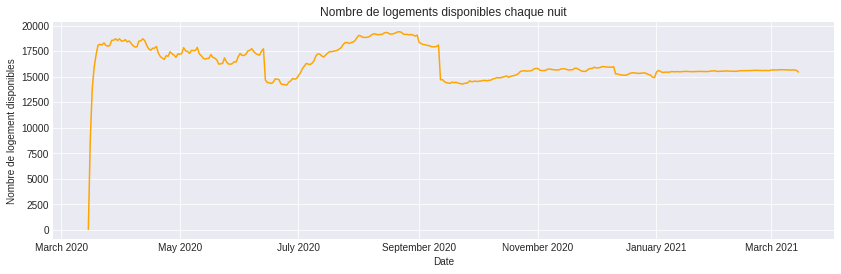

In [0]:
plt.plot(bydate, color="orange")
ax=plt.gca()
ax.xaxis.set_major_locator(pltdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%B %Y'))
plt.xlabel("Date")
plt.ylabel("Nombre de logement disponibles")
plt.title("Nombre de logements disponibles chaque nuit")
plt.grid()

### 8. Daily price for 2-persons accommodations

In [0]:
# planning

In [0]:
# df

In [0]:
accom2mean = planning.loc[:,["listing_id", "date", "price"]]
acco2mean = accom2mean.rename(columns={"listing_id": "id"})
acco2mean

,id,date,price
0,23742,2020-03-16,120.0
1,22979,2020-03-16,70.0
2,22979,2020-03-17,70.0
3,22979,2020-03-18,70.0
4,22979,2020-03-19,70.0
...,...,...,...
24572899,42314797,2021-03-11,120.0
24572900,42314797,2021-03-12,120.0
24572901,42314797,2021-03-13,120.0
24572902,42314797,2021-03-14,120.0


In [0]:
df_ = df[["id","accommodates"]]

In [0]:
df_1 = df_[df_["accommodates"]==2]
df_1

,id,accommodates
0,3109,2
1,5396,2
3,7964,2
5,9359,2
6,9952,2
...,...,...
64959,38667927,2
64961,38668013,2
64964,38668514,2
64965,38668522,2


In [0]:
planning.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [0]:
pl2 = planning[["listing_id", "price", "date"]]
pl2

,listing_id,price,date
0,23742,120.0,2020-03-16
1,22979,70.0,2020-03-16
2,22979,70.0,2020-03-17
3,22979,70.0,2020-03-18
4,22979,70.0,2020-03-19
...,...,...,...
24572899,42314797,120.0,2021-03-11
24572900,42314797,120.0,2021-03-12
24572901,42314797,120.0,2021-03-13
24572902,42314797,120.0,2021-03-14


In [0]:
pd.concat([df, planning], axis= 1)

In [0]:
# result['date']= pd.to_datetime(result['date'])

In [0]:
#### Jointure planning et df en vue d'avoir l'information accomodate

join = pd.merge(pl2, df_1, left_on='listing_id', right_on='id', how='left')
join

,listing_id,price,date,id,accommodates
0,23742,120.0,2020-03-16,NaN,NaN
1,22979,70.0,2020-03-16,22979.0,2.0
2,22979,70.0,2020-03-17,22979.0,2.0
3,22979,70.0,2020-03-18,22979.0,2.0
4,22979,70.0,2020-03-19,22979.0,2.0
...,...,...,...,...,...
24572899,42314797,120.0,2021-03-11,NaN,NaN
24572900,42314797,120.0,2021-03-12,NaN,NaN
24572901,42314797,120.0,2021-03-13,NaN,NaN
24572902,42314797,120.0,2021-03-14,NaN,NaN


In [0]:
#### Condition sur accomodate et group by par date

agg = join.groupby("date").price.mean().sort_values(ascending = True)
agg.index = pd.to_datetime(agg.index)
agg.sort_index(inplace = True)#### Très important de trier par index

In [0]:
agg.drop_duplicates()

date
2020-03-15     93.394904
2020-03-16    117.010784
2020-03-17    117.306359
2020-03-18    117.344711
2020-03-19    117.408790
                 ...    
2021-03-11    139.015329
2021-03-12    140.328432
2021-03-13    140.414420
2021-03-14    138.931168
2021-03-15    143.847914
Name: price, Length: 366, dtype: float64

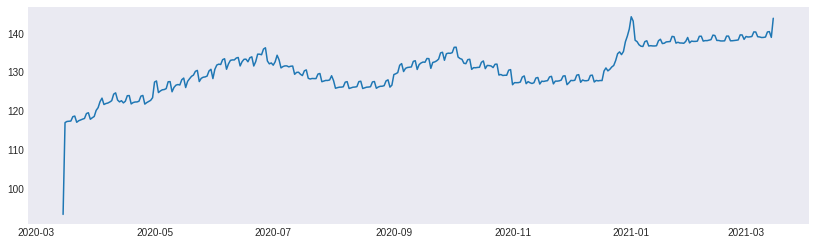

In [0]:
plt.plot(agg)

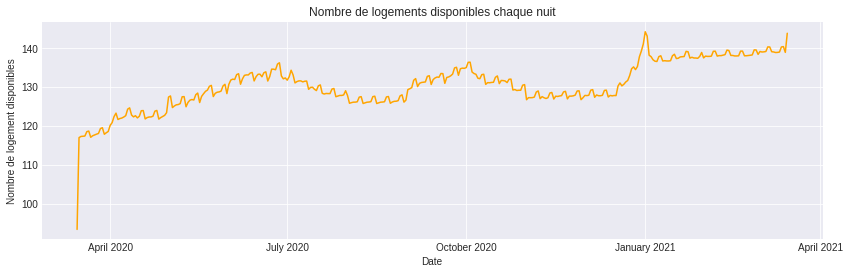

In [0]:
#### Prix des listings

plt.plot(agg, color="orange")
ax=plt.gca()
ax.xaxis.set_major_locator(pltdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%B %Y'))
plt.xlabel("Date")
plt.ylabel("Nombre de logement disponibles")
plt.title("Nombre de logements disponibles chaque nuit")
plt.grid()

In [0]:
#### Q9: WordCloud
import pandas as pd

reviews = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2020-03-15/data/reviews.csv.gz", compression="gzip", low_memory=False)

In [0]:
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3109,123127969,2016-12-27,12389804,Sophie,The host canceled this reservation the day bef...
1,3109,123274144,2016-12-28,67553494,Tom'S,The host canceled this reservation 2 days befo...
2,3109,207127433,2017-10-28,51636494,Patricia,Tout s'est bien déroulé. Merci bien. PG
3,3109,208779822,2017-11-03,4142888,Patricia,Un petit nid fouiller douillet situé dans app...
4,3109,234257457,2018-02-12,3539452,Dominique,The host canceled this reservation 8 days befo...
5,3109,295840159,2018-07-24,7415343,Laurent,"Appartement spacieux, propre,clair, et calme à..."
6,3109,297207211,2018-07-27,202957965,Eleonora,The host canceled this reservation 2 days befo...
7,3109,360052439,2018-12-19,13723090,Marc,The host canceled this reservation 15 days bef...
8,3109,553502638,2019-10-24,21159216,Anastasia,"Appartement totalement rénové, en parfait état..."
9,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...


In [0]:
#### Nombre de modalité et affichage de la colonne comment

reviews[["comments"]].describe()

,comments
count,1373357
unique,1319194
top,The host canceled this reservation 2 days befo...
freq,1715


In [0]:
reviews[["comments"]].describe().comments.head(1) 

count    1373357
Name: comments, dtype: object

In [0]:
reviews[["comments"]].describe().iloc[1,:][0]

1319194

In [0]:
reviews[["comments"]].describe().iloc[0,:][0] - reviews[["comments"]].describe().iloc[1,:][0]

54163

In [0]:
#### Le nombre de doublon total: Quid de la distribution ?

In [0]:
doublon = pd.DataFrame(reviews.groupby("comments").id.count().sort_values(ascending = False))
doublon

,id
comments,
The host canceled this reservation 2 days before arrival. This is an automated posting.,1715
The host canceled this reservation the day before arrival. This is an automated posting.,1526
The host canceled this reservation 3 days before arrival. This is an automated posting.,1306
.,1174
The host canceled this reservation 4 days before arrival. This is an automated posting.,1045
...,...
"Super nice view at effiel tour.\nVery good apartment.\nSafety, clean and very nice people.\nTotally are good for sure.",1
"Super nice view of Sacré Cœur, well communicated with city centre.",1
Super nice!,1


In [0]:
doublon.id[0]

1715

In [0]:
#### Afficher les lignes telle que la somme des count id fasse 54 163

#### Condition: Tant que la somme pas inférieur à 54 163: Sommer
#### Sinon afficher index


In [0]:
i = 0
somme_id = 0
a = []
for i in range(0, len(doublon)):
#   somme_id = doublon.id[i] + somme_id
  #a.append(i)
  while somme_id < 54163:
    #print(i,"Pas encore")
    somme_id = somme_id + doublon.id[i]
    a.append(somme_id)
    print(somme_id)
    #print(doublon.id[i])

1715
3430
5145
6860
8575
10290
12005
13720
15435
17150
18865
20580
22295
24010
25725
27440
29155
30870
32585
34300
36015
37730
39445
41160
42875
44590
46305
48020
49735
51450
53165
54880


In [0]:
len(a)

32

In [0]:
#### On regarde la liste à partir de la 32ème valeur

In [0]:
doublon.iloc[32:,:] #### PB

,id
comments,
The host canceled this reservation 26 days before arrival. This is an automated posting.,251
The host canceled this reservation 27 days before arrival. This is an automated posting.,242
The host canceled this reservation 29 days before arrival. This is an automated posting.,239
Good location,236
The host canceled this reservation 30 days before arrival. This is an automated posting.,232
...,...
"Super nice view at effiel tour.\nVery good apartment.\nSafety, clean and very nice people.\nTotally are good for sure.",1
"Super nice view of Sacré Cœur, well communicated with city centre.",1
Super nice!,1


In [0]:
doublon.head(25)

,id
comments,
The host canceled this reservation 2 days before arrival. This is an automated posting.,1715
The host canceled this reservation the day before arrival. This is an automated posting.,1526
The host canceled this reservation 3 days before arrival. This is an automated posting.,1306
.,1174
The host canceled this reservation 4 days before arrival. This is an automated posting.,1045
The host canceled this reservation 5 days before arrival. This is an automated posting.,875
The host canceled this reservation 8 days before arrival. This is an automated posting.,826
The host canceled this reservation 7 days before arrival. This is an automated posting.,826
The host canceled this reservation 6 days before arrival. This is an automated posting.,753


In [0]:
doublon[doublon.index.str.startswith("The host canceled this reservation")]

,id
comments,
The host canceled this reservation 2 days before arrival. This is an automated posting.,1715
The host canceled this reservation the day before arrival. This is an automated posting.,1526
The host canceled this reservation 3 days before arrival. This is an automated posting.,1306
The host canceled this reservation 4 days before arrival. This is an automated posting.,1045
The host canceled this reservation 5 days before arrival. This is an automated posting.,875
...,...
The host canceled this reservation 293 days before arrival. This is an automated posting.,1
The host canceled this reservation 295 days before arrival. This is an automated posting.,1
The host canceled this reservation 303 days before arrival. This is an automated posting.,1


In [0]:
doublon[doublon.index.str.startswith("The host canceled this reservation")].count()

id    366
dtype: int64

In [0]:
comment_clean = doublon.loc[~doublon.index.str.startswith("The host canceled this reservation")]
comment_clean

,id
comments,
.,1174
Great location,562
Great location!,547
Parfait,513
Très bien,497
...,...
"Super nice view at effiel tour.\nVery good apartment.\nSafety, clean and very nice people.\nTotally are good for sure.",1
"Super nice view of Sacré Cœur, well communicated with city centre.",1
Super nice!,1


In [0]:
#### Filtre des commentaires

comment_clean.sort_index(ascending = True)

,id
comments,
"\t \t\r\nIl y avait un bon courriel avec Sylvian communication avec une description détaillée de l'itinéraire. Toutes les questions au sujet de l'appartement ont été exaucées immédiatement.\r\nSylvian était à l'arrivée et nous a accueillis très sympathique.\r\nNous avions seulement tellement de temps à la conversation, comme il le souhaite, attendu de nos amis dans la voiture sur la route et la voiture était sur la route étroite sur le trottoir parce qu'il n'y n'avait aucun parking à l'époque.\r\nAppartement est idéalement situé dans le Centre, et depuis la fenêtre dans les halos, il était également très calme. Très bien conseillé.",1
\tappartement très bien situé dans une rue très commerçante avec toutes les commodités. À 5 minutes des Champs Elysées à pied. Jolie cour intérieure ...,1
"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n (Website hidden by Airbnb) Roh-/Feinplanie (Hinterfüllung),ca.35c (Website hidden by Airbnb) Drainage-/Filterschicht, z.B. Enkadrain S5006, 1c (Website hidden by Airbnb) Wärmedämmung, z.B. XPS Roofmate SL-A, 8c (Website hidden by Airbnb) Abdichtung mit Polymerbitumen 1-lagig, EP5 flam WF, 1.5c (Website hidden by Airbnb) Betondecke, OK im Gefälle, 35-45c (Website hidden by Airbnb) UNITEX SW Typ3, Kanten AK-95, in Schalung eingelegt, 3.5c (Website hidden by Airbnb) Schmutzschleus (Website hidden by Airbnb) Teppich\n\n\n\n\n\n\n\nWe had a great stay at simon. The connections with the metro were great. We will gladly come again.",1
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nApartment in a great district with lots of restaurants and cafes nearby. Good transport links from Republique metro line. \n\n,1
"\n\n\n\nI will be honest in this review. My girlfriend and I came to spend a long weekend in Paris. \n\nPro:\n* Location is good\n* Great view from room\n* Friendly staff\n* Great communication and resolved issues swiftly through AirBnB\n* Basic but free breakfast\n\nCons:\n* Room wasn't as pictured and quite basic\n* Bathroom was tiny (e.g. you could not sit on the loo and shut the door etc)\n* The Toilet / Shower weren't completely clean\n* Floor just outside the bathroom had signs of damp\n\nUnfortunately, after having suffered an ankle injury last year and still on the road to full recovery, the cons meant we had to move hotels after the first night (we got there past Midnight or we would have probably moved for all of the 3 nights we were in Paris). \n\nAs a credit to the team at Le Regent though, they were very good with communicating and resolving the issue once i'd left (even refunded money for 2 nights). They also acknowledged these issues and responded with a plan to upgrade the property. \n\n",1
...,...
ﾛﾄﾞﾙﾌのお部屋は､とても清潔でおしゃれです｡天井も高くｽﾃｷな空間だったので､快適に過ごせました｡\nﾒｯｾｰｼﾞの対応も素早かったので安心しました｡\nｵﾍﾟﾗの方にﾎﾃﾙをとるのも良いですが､少し喧騒から離れ､暮らすようにﾊﾟﾘを楽しむことができる立地です｡\n\n素敵なﾊﾟﾘ旅行にしてくれて､\n本当にありがとうございました｡,1
ﾛﾏﾝの部屋は､地下鉄の駅からも近く､周りにもｽｰﾊﾟｰもあり､とても便利なところです｡夜に出歩くのにも安全です｡ｵﾍﾟﾗ座やﾙｰﾌﾞﾙ美術館へも20分程度の散歩でたどり着きました｡ﾛﾏﾝは非常に親切で､ﾍﾞﾙｻｲﾕ宮殿や飛行場への列車やﾊﾞｽの時間を調べてくれて､週末の列車の運休やｽﾄﾗｲｷの情報を得ることができたので､とても助かりました｡最上階の部屋からのﾊﾟﾘ市内の景色も最高で､本当に素晴らしい時間を過ごすことができました｡,1
ﾛﾝﾄﾞﾝからﾕｰﾛｽﾀｰを使ってﾊﾟﾘ入りしました｡Gare Du Nord駅から歩いて10分の便利な場所にあるﾌﾗｯﾄです｡ﾎｽﾄのﾄｰﾏｽはﾌﾚﾝﾄﾞﾘｰでﾒｰﾙの返答も早くｺﾐｭﾆｹｰｼｮﾝが取りやすかったです｡ﾌﾗｯﾄなは写真で見た通り｡とてもおしゃれで広々としており､ﾊﾟﾘの典型的なﾌﾗｯﾄの雰囲気が味わえます｡ｼｬﾜｰ圧も温度も問題なく使えました｡また部屋も暖かく快適でした｡ﾌﾗｯﾄの建物自体はﾒｲﾝｽﾄﾘｰﾄに面しているのですが､部屋は内側にあるので外の雑踏も入らず静かです｡唯一､気になる点はﾌﾗｯﾄの最寄駅付近に何かを売買している人たちがたむろっており夜間､女の子だけで歩くのは避けた方が良いです｡多国籍の人々が行き交っている場所でかなり賑やかな庶民的な地域です｡主要観光ｽﾎﾟｯﾄには電車で行けますし､ｻｸﾚ･ｸｰﾙ寺院へは徒歩で行けます｡数人で宿泊するには絶好の場所かと思います｡,1


In [0]:
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

##### On définie une fonction de nettoyage des donnée

def remove_url(txt):
    """Remplace les url trouvée par le caractère vide " "
    

    Parametre
    ----------
    txt : string
        la variable string que l'on soutaite remplacé

    Sortie
    -------
    
    Le fichier nettoyé des url
    
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


# On retire les caractères de chaque ligne
corpus_sans_urls = [remove_url(i)  for i in comment_clean.index]

In [0]:
corpus_sans_urls

['',
 'Great location',
 'Great location',
 'Parfait',
 'Trs bien',
 'Good',
 'Great place',
 'Good location',
 'Great place',
 'Great location',
 'Super',
 'Parfait',
 'Bien',
 'Nice place',
 'Top',
 'Ok',
 'Great',
 '',
 'Je recommande',
 'good',
 'Excellent',
 'Great stay',
 'Great',
 'Trs bon sjour',
 'Very good',
 'The reservation was canceled the day before arrival This is an automated posting',
 'Perfect',
 'Merci',
 'Parfait',
 'Great stay',
 'Ras',
 'Excelente',
 'Trs bien',
 'Good place',
 'Nice',
 'Great place to stay',
 'Super',
 'Perfect',
 '',
 'parfait',
 'Super',
 'The reservation was canceled 2 days before arrival This is an automated posting',
 'trs bien',
 'RAS',
 'The reservation was canceled 3 days before arrival This is an automated posting',
 'Great place to stay',
 'Bon rapport qualit prix',
 'Bon sjour',
 '',
 'Trs bien',
 'Excelente ubicacin',
 'Trs bien',
 'Very nice',
 'Trs bon accueil',
 'Trs bien situ',
 'Perfect location',
 'Perfect location',
 'Tres bien

In [0]:
mots_dans_corpus = [corpus.lower().split() for corpus in corpus_sans_urls]
mots_dans_corpus

[[],
 ['great', 'location'],
 ['great', 'location'],
 ['parfait'],
 ['trs', 'bien'],
 ['good'],
 ['great', 'place'],
 ['good', 'location'],
 ['great', 'place'],
 ['great', 'location'],
 ['super'],
 ['parfait'],
 ['bien'],
 ['nice', 'place'],
 ['top'],
 ['ok'],
 ['great'],
 [],
 ['je', 'recommande'],
 ['good'],
 ['excellent'],
 ['great', 'stay'],
 ['great'],
 ['trs', 'bon', 'sjour'],
 ['very', 'good'],
 ['the',
  'reservation',
  'was',
  'canceled',
  'the',
  'day',
  'before',
  'arrival',
  'this',
  'is',
  'an',
  'automated',
  'posting'],
 ['perfect'],
 ['merci'],
 ['parfait'],
 ['great', 'stay'],
 ['ras'],
 ['excelente'],
 ['trs', 'bien'],
 ['good', 'place'],
 ['nice'],
 ['great', 'place', 'to', 'stay'],
 ['super'],
 ['perfect'],
 [],
 ['parfait'],
 ['super'],
 ['the',
  'reservation',
  'was',
  'canceled',
  '2',
  'days',
  'before',
  'arrival',
  'this',
  'is',
  'an',
  'automated',
  'posting'],
 ['trs', 'bien'],
 ['ras'],
 ['the',
  'reservation',
  'was',
  'canceled'

In [0]:
# List of all words across corpus
ensemble_mots_pas_urls = list(itertools.chain(*mots_dans_corpus))

# Compte des mots
counts_no_urls = collections.Counter(ensemble_mots_pas_urls)

counts_no_urls.most_common(40)

[('the', 2474622),
 ('and', 2164175),
 ('a', 1599691),
 ('to', 1355163),
 ('is', 1046289),
 ('was', 1024634),
 ('in', 932645),
 ('very', 715282),
 ('we', 658484),
 ('of', 639666),
 ('for', 586660),
 ('apartment', 564315),
 ('de', 496322),
 ('it', 479756),
 ('et', 473085),
 ('great', 472101),
 ('with', 445132),
 ('paris', 433102),
 ('i', 431414),
 ('trs', 399582),
 ('place', 383637),
 ('stay', 377364),
 ('location', 376598),
 ('you', 364241),
 ('la', 278936),
 ('est', 274252),
 ('our', 264788),
 ('this', 263835),
 ('but', 252518),
 ('us', 244320),
 ('metro', 242753),
 ('un', 237017),
 ('at', 236349),
 ('on', 234818),
 ('as', 232262),
 ('had', 230866),
 ('there', 222768),
 ('bien', 220459),
 ('nice', 219442),
 ('were', 210566)]

In [0]:
clean_corpus_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['mots', 'compte'])

clean_corpus_no_urls.head()

,mots,compte
0,the,2474622
1,and,2164175
2,a,1599691
3,to,1355163
4,is,1046289


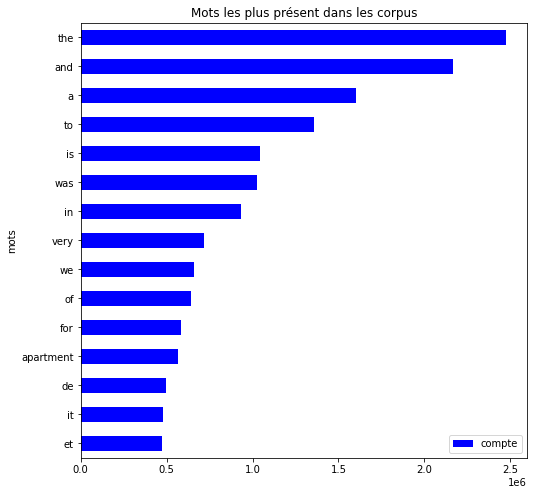

In [0]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_corpus_no_urls.sort_values(by='compte').plot.barh(x='mots',
                      y='compte',
                      ax=ax,
                      color="blue")

ax.set_title("Mots les plus présent dans les corpus")

plt.show()

In [0]:
nltk.download('stopwords')

stop_words_fr = set(stopwords.words('french'))
stop_words_en = set(stopwords.words('english'))

# View a few words from the set
list(stop_words_fr)[0:25]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['aura',
 'eux',
 'aurez',
 'votre',
 'avaient',
 'étées',
 'est',
 'était',
 'auront',
 'ayons',
 'eue',
 'eussions',
 'eusses',
 'fusse',
 'aviez',
 'des',
 'mes',
 'un',
 'serions',
 'aie',
 'sur',
 'que',
 'aux',
 'même',
 'm']

In [0]:
corpus_sans_sw_fr = [[mots for mots in mots_corpus if not mots in stop_words_fr]
                 for mots_corpus in mots_dans_corpus]

In [0]:
mots_dans_corpus[1:5]

[['great', 'location'], ['great', 'location'], ['parfait'], ['trs', 'bien']]

In [0]:
corpus_sans_sw_fr[1]


['great', 'location']

In [0]:
#stop_words_en

[mots for mots in corpus_sans_sw_fr[1] if not mots in stop_words_en]

['great', 'location']

In [0]:
#### Meme chose avec les stop word anglais (Chaque objet, chaque mot)
corpus_sans_sw_fr_en = [[mots for mots in mots_corpus if not mots in stop_words_en] for mots_corpus in corpus_sans_sw_fr]
corpus_sans_sw_fr_en[1:10]

[['great', 'location'],
 ['great', 'location'],
 ['parfait'],
 ['trs', 'bien'],
 ['good'],
 ['great', 'place'],
 ['good', 'location'],
 ['great', 'place'],
 ['great', 'location']]

In [0]:
# for mots_corpus in corpus_sans_sw_fr:
#   # for mots in corpus_sans_sw_fr:
#   #   if not mots in stop_words_en:
#   #     print(mots)

In [0]:
ens_mot_sans_sw = list(itertools.chain(*corpus_sans_sw_fr_en[1:10]
))
compte_tw_no_sw = collections.Counter(ens_mot_sans_sw)
compte_tw_no_sw.most_common(15)

[('great', 5),
 ('location', 4),
 ('good', 2),
 ('place', 2),
 ('parfait', 1),
 ('trs', 1),
 ('bien', 1)]

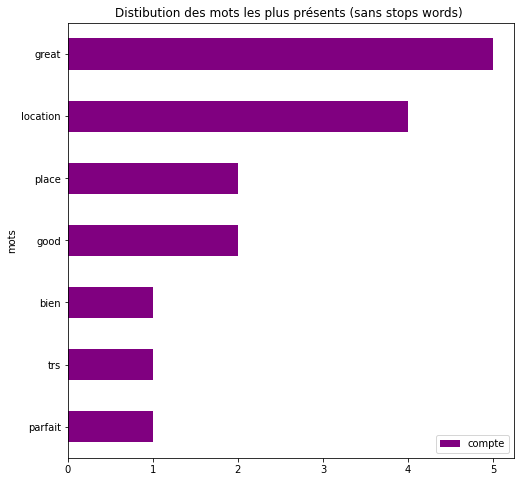

In [0]:
corpus_filtre = pd.DataFrame(compte_tw_no_sw.most_common(300),
                             columns=['mots', 'compte'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
corpus_filtre.sort_values(by='compte').plot.barh(x='mots',
                      y='compte',
                      ax=ax,
                      color="purple")

ax.set_title("Distibution des mots les plus présents (sans stops words) ")

plt.show()

In [0]:
a_retirer = ["rt", "a", "plus","cette","fait","faire","sans","comment"] #### A modifier selon ce qui apparait

#### On réutilise double listes

corpus_sans_mots_bannnis = [[mots for mots in mots_corpus if mots not in a_retirer]
                 for mots_corpus in corpus_sans_sw]

In [0]:
corpus_sans_mots_bannnis

[[],
 ['great', 'location'],
 ['great', 'location'],
 ['parfait'],
 ['trs', 'bien'],
 ['good'],
 ['great', 'place'],
 ['good', 'location'],
 ['great', 'place'],
 ['great', 'location'],
 ['super'],
 ['parfait'],
 ['bien'],
 ['nice', 'place'],
 ['top'],
 ['ok'],
 ['great'],
 [],
 ['recommande'],
 ['good'],
 ['excellent'],
 ['great', 'stay'],
 ['great'],
 ['trs', 'bon', 'sjour'],
 ['very', 'good'],
 ['the',
  'reservation',
  'was',
  'canceled',
  'the',
  'day',
  'before',
  'arrival',
  'this',
  'is',
  'an',
  'automated',
  'posting'],
 ['perfect'],
 ['merci'],
 ['parfait'],
 ['great', 'stay'],
 ['ras'],
 ['excelente'],
 ['trs', 'bien'],
 ['good', 'place'],
 ['nice'],
 ['great', 'place', 'to', 'stay'],
 ['super'],
 ['perfect'],
 [],
 ['parfait'],
 ['super'],
 ['the',
  'reservation',
  'was',
  'canceled',
  '2',
  'days',
  'before',
  'arrival',
  'this',
  'is',
  'an',
  'automated',
  'posting'],
 ['trs', 'bien'],
 ['ras'],
 ['the',
  'reservation',
  'was',
  'canceled',
  '3

In [0]:
ens_mot_sans_smb = list(itertools.chain(*corpus_sans_mots_bannnis))
compte_tw_no_smb = collections.Counter(ens_mot_sans_smb)
compte_tw_no_smb.most_common(15)

[('the', 2474622),
 ('and', 2164175),
 ('to', 1355163),
 ('is', 1046289),
 ('was', 1024634),
 ('in', 932645),
 ('very', 715282),
 ('we', 658484),
 ('of', 639666),
 ('for', 586660),
 ('apartment', 564315),
 ('it', 479756),
 ('great', 472101),
 ('with', 445132),
 ('paris', 433102)]

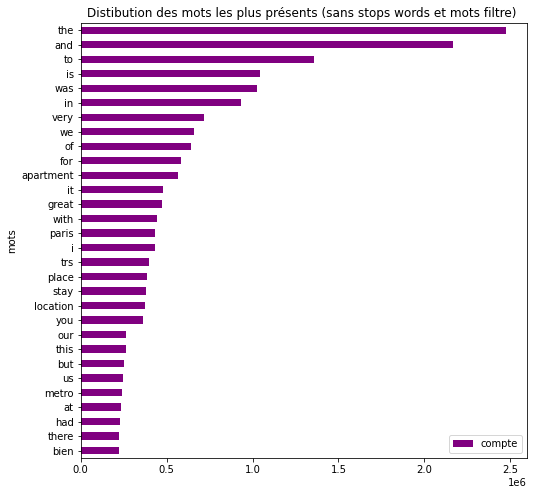

In [0]:
corpus_filtre_2 = pd.DataFrame(compte_tw_no_smb.most_common(30),
                             columns=['mots', 'compte'])

fig, ax = plt.subplots(figsize=(8, 8))

corpus_filtre_2.sort_values(by='compte').plot.barh(x='mots',
                      y='compte',
                      ax=ax,
                      color="purple")

ax.set_title("Distibution des mots les plus présents (sans stops words et mots filtre) ")

plt.show()

In [0]:
corpus_filtre_2

,mots,compte
0,the,2474622
1,and,2164175
2,to,1355163
3,is,1046289
4,was,1024634
5,in,932645
6,very,715282
7,we,658484
8,of,639666
9,for,586660


In [0]:
a_retirer_2 = ["the", "and", "is","to","was","in","very","we", "of", "for", "it", "at", "bus", "had"] #### A modifier selon ce qui apparait

#### On réutilise double listes

corpus_sans_mots_bannnis_2 = [mots for mots in compte_tw_no_smb if mots not in a_retirer_2]
corpus_sans_mots_bannnis_2

['great',
 'location',
 'parfait',
 'trs',
 'bien',
 'good',
 'place',
 'super',
 'nice',
 'top',
 'ok',
 'recommande',
 'excellent',
 'stay',
 'bon',
 'sjour',
 'reservation',
 'canceled',
 'day',
 'before',
 'arrival',
 'this',
 'an',
 'automated',
 'posting',
 'perfect',
 'merci',
 'ras',
 'excelente',
 '2',
 'days',
 '3',
 'rapport',
 'qualit',
 'prix',
 'ubicacin',
 'accueil',
 'situ',
 'tres',
 '5',
 'everything',
 '4',
 'amazing',
 'bonne',
 'adresse',
 'buena',
 'host',
 '15',
 '9',
 'emplacement',
 'muy',
 '8',
 'apartment',
 '7',
 'x',
 'tout',
 'tait',
 'cool',
 'bel',
 'appartement',
 '6',
 'agrable',
 'all',
 'thank',
 'you',
 '10',
 'recomendable',
 '12',
 'lovely',
 'recommander',
 'fantastic',
 'thanks',
 '11',
 'correct',
 'todo',
 'perfecto',
 'conforme',
 'description',
 'genial',
 'experience',
 'impeccable',
 'highly',
 'recommended',
 '14',
 '16',
 '13',
 'superbe',
 '17',
 '19',
 'plac',
 'spot',
 'excellente',
 'logement',
 'nickel',
 'vivement',
 '20',
 'no',
 

In [0]:
# Create a list of word
text=str(corpus_sans_mots_bannnis_2)

In [0]:
# Create the wordcloud object
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=1000,background_color="skyblue", margin=0).generate(text)


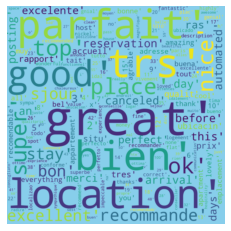

In [0]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [0]:
#doublon[doublon.index != doublon.index.str.startswith("The host canceled this reservation") ]